In this blog post, I will discuss a straightforward system for categorizing the prices of used cell phones in an online store. The goal is to use the K-Mean method to allocate cell phones to different price categories based on their mobile specifications.

# Data
I used the dataset from Kaggle. ([data-set](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)). The dataset provides the following information:

|Variable name |Description| 
|:-----|:-----|
|battery_power |Total energy a battery can store in one time measured in mAh|
|int_memory|Internal Memory in Gigabytes|
|mobile_wt|Weight of mobile phone|
|ram|Random Access Memory in Megabytes|



In [32]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rtava/MLProject/master/posts/K_Mean/Mobile_dataset.csv")
df = df[['battery_power','int_memory','mobile_wt','ram']]

In [33]:
df.head()

,battery_power,int_memory,mobile_wt,ram
0,1043,5,193,3476
1,841,61,191,3895
2,1807,27,186,2396
3,1546,25,96,3893
4,1434,49,108,1773


# Model Estimation

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.values[:,1:]
X = np.nan_to_num(X)
x_data = StandardScaler().fit_transform(X)

To begin with, I set the number of clusters to 4 and then categorized cell phones based on their specifications.

In [35]:
from sklearn.cluster import KMeans 


k_means = KMeans(init = "k-means++", n_clusters = 4, 
                 n_init=12, random_state=42)

k_means.fit(x_data)
df['Cluster'] = k_means.labels_

In [36]:
print("The value of cost function (K-mean Inertia) with 4 clusters is: %0.2f" % (k_means.inertia_))

The value of cost function (K-mean Inertia) with 4 clusters is: 1399.57


## Optimal Number of Clusters

In this step, I calculate the "K-mean Inertia" for different numbers of clusters from 1 to 20, and plot the values. Based on the results, I can determine the optimal number of clusters to categorize cell phones.

In [37]:
import warnings
warnings.filterwarnings('ignore')

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_data)
                for k in range(1, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]


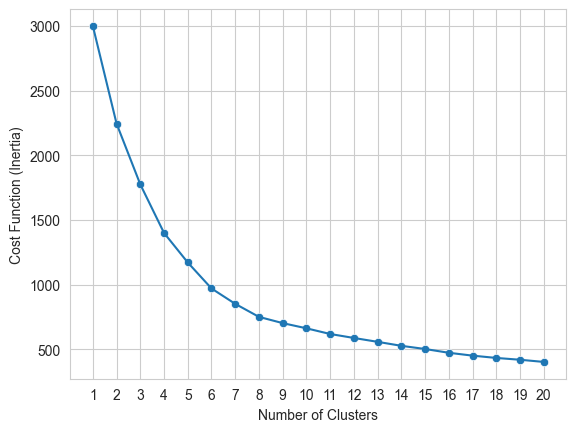

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
a = sns.lineplot(x= range(1, 21), y = inertias)
b = sns.scatterplot(x= range(1, 21), y = inertias)

b.set_xticks(range(1,21)) 
b.set_xlabel("Number of Clusters")
b.set_ylabel("Cost Function (Inertia)")

plt.show();

I set number of cluster to 6

In [39]:
k_means = KMeans(init = "k-means++", n_clusters = 6, 
                 n_init=12, random_state=42)

k_means.fit(x_data)
df['Cluster'] = k_means.labels_

The following plot shows the relation between clusterring, internal memory, and ram. 

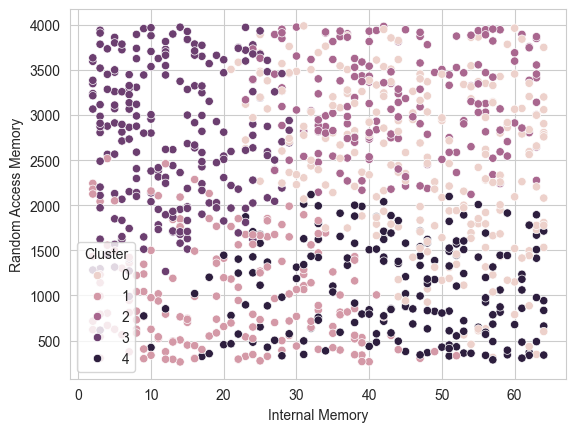

In [40]:
import seaborn as sns
g = sns.scatterplot(data=df, x="int_memory", y="ram", hue="Cluster")
g.set_xlabel("Internal Memory")
g.set_ylabel("Random Access Memory")

plt.show();